## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [6]:
'FIFA World Cup' in df['tournament'].unique() # can check directly if string is spelled properly, otherwise must manually check through .unique()?

True

### Method 1

In [27]:
print(len(df['home_team'].unique())) # should have done this after, from the filtered df[world_cup] dataframe
print(len(df['away_team'].unique()))
home = df['home_team'].tolist()
away = df['away_team'].tolist()
total_unique = set(home + away)
print(len(total_unique))
total_unique = list(total_unique)

308
305
312


In [11]:
world_cup = df['tournament'] == 'FIFA World Cup'
df[world_cup]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


In [127]:
Q1_dict = dict.fromkeys(total_unique, 0) # initialization dict, each key (each team) starts with value of 0

In [128]:
for index, row in df[world_cup].iterrows():  # would switching the first 2 lines with each other make the loop much faster?
    for team in total_unique:
        if row['home_team'] == team:   
            Q1_dict[team] += row['home_score']   # adds home_score when given team is home team
        if row['away_team'] == team:
            Q1_dict[team] += row['away_score']   # adds away_score when given team is now away team

In [129]:
FIFA = pd.DataFrame(Q1_dict.items(), columns=['Team', 'Score'])

In [130]:
FIFA_top_10 = FIFA.sort_values(by='Score', ascending=False).iloc[:10]
FIFA_top_10.head() # results seem to make sense. Confirm with sanity check

,Team,Score
237,Brazil,229
268,Germany,226
282,Argentina,137
54,Italy,128
292,France,120


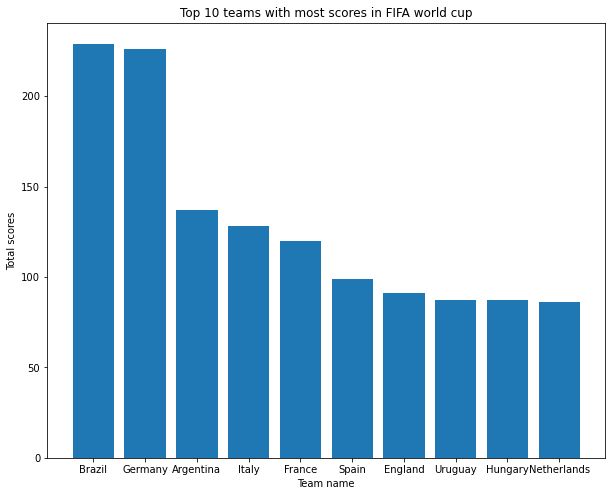

In [120]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(FIFA_top_10['Team'], FIFA_top_10['Score'])
ax.set_ylabel('Total scores')
ax.set_xlabel('Team name')
ax.set_title('Top 10 teams with most scores in FIFA world cup')
plt.show()

In [ ]:
# sanity check
brazil_true_total_score = 0
for index, row in df[world_cup].iterrows():
    if row['home_team'] == 'Brazil':
        brazil_true_total_score += row['home_score']
    if row['away_team'] == 'Brazil':
        brazil_true_total_score += row['away_score']

In [ ]:
brazil_true_total_score # method 1 is correct!

### Method 2 
see note at end

In [136]:
simple = df[world_cup].groupby(by='home_team').sum().sort_values(by='home_score', ascending=False) 
simple['total_score'] = simple['home_score'] + simple['away_score']
simple.head() # neutral column is meaningless

,home_score,away_score,neutral,total_score
home_team,,,,
Brazil,177,83,71.0,260
Germany,158,77,63.0,235
Argentina,114,61,53.0,175
France,85,45,31.0,130
Italy,72,37,37.0,109


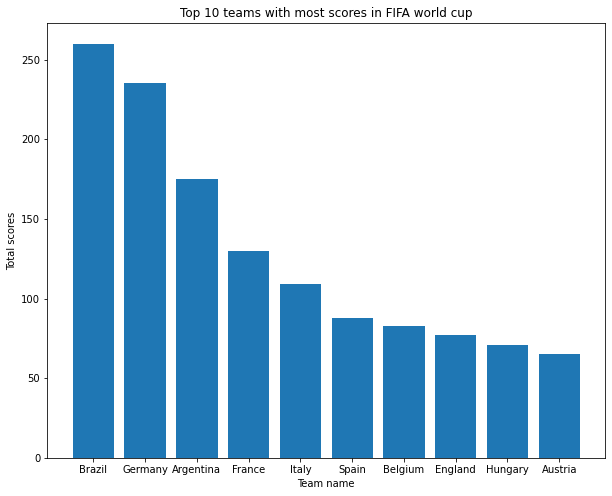

In [139]:
top_10 = simple.sort_values(by='total_score', ascending=False).iloc[:10]


fig, ax = plt.subplots(figsize=(10,8))
ax.bar(top_10.index, top_10['total_score'])
ax.set_ylabel('Total scores')
ax.set_xlabel('Team name')
ax.set_title('Top 10 teams with most scores in FIFA world cup')
plt.show()

Potential problem with this one. The total_score might be incorrect, as away_score doesn't seem to make sense in a groupby here. The away_score shown when doing a group by home_team, as done here, is actually the number of goals scored against the team, not the scores made by the team as an away team

## Task
What is the number of matches played in each tournament throughout history?

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
len(df['tournament'].unique()) # 112 different tournaments

112

In [6]:
Q2 = df.groupby(by='tournament').count().sort_values(by='date', ascending=False) # there is 112 tournaments to display, how to show visiually?
Q2

,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
Friendly,17029,17029,17029,17029,17029,17029,17029,17029
FIFA World Cup qualification,7236,7236,7236,7236,7236,7236,7236,7236
UEFA Euro qualification,2582,2582,2582,2582,2582,2582,2582,2582
African Cup of Nations qualification,1672,1672,1672,1672,1672,1672,1672,1672
FIFA World Cup,900,900,900,900,900,900,900,900
...,...,...,...,...,...,...,...,...
Dragon Cup,4,4,4,4,4,4,4,4
World Unity Cup,4,4,4,4,4,4,4,4
Copa América qualification,2,2,2,2,2,2,2,2


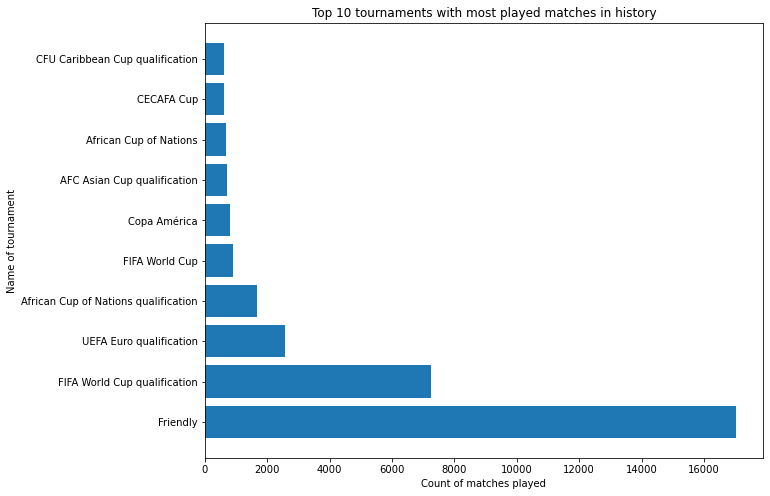

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(Q2.index[:10], Q2['date'].iloc[:10])
ax.set_xlabel('Count of matches played')
ax.set_ylabel('Name of tournament')
ax.set_title('Top 10 tournaments with most played matches in history')
plt.show()

## Task 
Show the trend in number of matches per year.

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
from datetime import datetime

In [6]:
df['date']

0        1872-11-30
1        1873-03-08
2        1874-03-07
3        1875-03-06
4        1876-03-04
            ...    
41581    2020-01-10
41582    2020-01-12
41583    2020-01-15
41584    2020-01-19
41585    2020-02-01
Name: date, Length: 41586, dtype: object

In [7]:
df['date'] =  pd.to_datetime(df['date'])

In [8]:
df['date'][0].year

1872

In [9]:
year_list = []
for dates in df['date']:
    year = dates.year
    year_list.append(year)
df['year'] = year_list

In [10]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [13]:
Q3 = df.groupby(by='year').count()
Q3

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
year,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
2016,926,926,926,926,926,926,926,926,926
2017,958,958,958,958,958,958,958,958,958
2018,905,905,905,905,905,905,905,905,905


<AxesSubplot:xlabel='year', ylabel='date'>

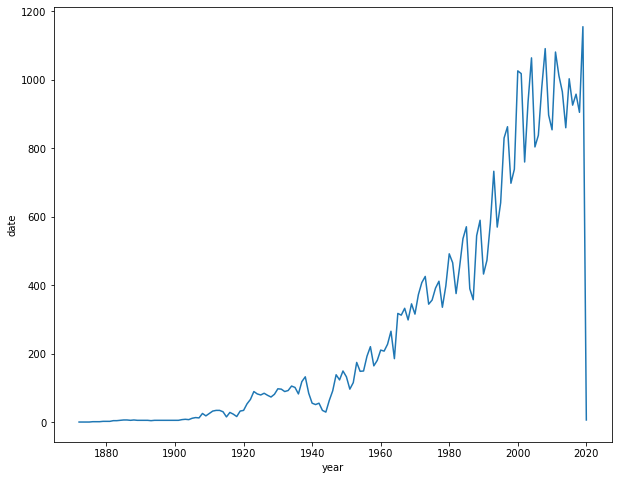

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=Q3, x=Q3.index, y='date')

### Observation
exponential grow in number of matches per year, with a sudden drop in 2020. At a first glance possible that the data is from early 2020, where not many matches have been played yet

## Task
Which teams are the most successful ones? (winning percentage)

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

## Task
Which teams played against each other the most?

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.